In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
# Dataset for a Classification model
heart_disease = pd.read_csv('Data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_disease.shape

(303, 14)

In [6]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Dataset for a regression problem
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [10]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
boston_df['target'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
# Checking some insights
boston_df.shape, boston_df.isna().sum()

((506, 14),
 CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 target     0
 dtype: int64)

# Classification Model & Evaluation

In [15]:
np.random.seed(43)
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


clf = RandomForestClassifier().fit(x_train, y_train)

# Evaluation with 2 different API's method
## 1. Estimator Score Method
## 2. Scoring Parameters

** Estimator Score Method **

In [29]:
# 1. Score

clf.score(x_test, y_test)

0.8852459016393442

In [18]:
np.mean(cross_val_score(clf, x, y))

0.811639344262295

In [30]:
# 2. ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
y_preds = clf.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

import seaborn as sns
sns.heatmap(fpr, tpr)

IndexError: Inconsistent shape between the condition and the input (got (3, 1) and (3,))

In [22]:
fpr

array([0.        , 0.21428571, 1.        ])

In [24]:
y_probs = clf.predict_proba(x_test)
y_probs

array([[0.8 , 0.2 ],
       [0.21, 0.79],
       [0.61, 0.39],
       [0.23, 0.77],
       [0.06, 0.94],
       [0.04, 0.96],
       [0.4 , 0.6 ],
       [0.16, 0.84],
       [0.07, 0.93],
       [0.52, 0.48],
       [0.72, 0.28],
       [0.08, 0.92],
       [0.62, 0.38],
       [0.39, 0.61],
       [0.35, 0.65],
       [0.17, 0.83],
       [0.93, 0.07],
       [0.57, 0.43],
       [0.01, 0.99],
       [0.22, 0.78],
       [0.14, 0.86],
       [0.25, 0.75],
       [0.95, 0.05],
       [0.9 , 0.1 ],
       [0.24, 0.76],
       [0.05, 0.95],
       [0.25, 0.75],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.82, 0.18],
       [0.23, 0.77],
       [0.85, 0.15],
       [0.96, 0.04],
       [0.31, 0.69],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.92, 0.08],
       [0.48, 0.52],
       [0.71, 0.29],
       [0.54, 0.46],
       [0.1 , 0.9 ],
       [0.56, 0.44],
       [0.91, 0.09],
       [1.  , 0.  ],
       [0.18, 0.82],
       [0.91, 0.09],
       [0.44, 0.56],
       [0.23,

In [25]:
y_probs_positive = y_probs[: , 1]
y_probs_positive[:11]

array([0.2 , 0.79, 0.39, 0.77, 0.94, 0.96, 0.6 , 0.84, 0.93, 0.48, 0.28])

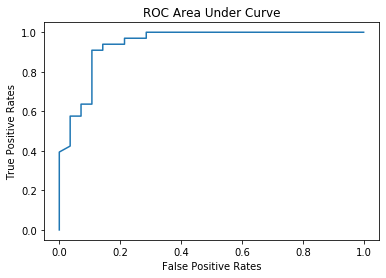

In [28]:
# Now checking the roc curve 
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

plt.plot(fpr, tpr);
plt.title('ROC Area Under Curve')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.show();

In [33]:
y_test.shape, y_preds.shape

((61,), (61,))

In [34]:
roc_auc_score(y_test, y_preds)

0.8777056277056278

In [38]:
# 3. Confusion Metrix (where the model should confused)
from sklearn.metrics import confusion_matrix

conf_metrix = confusion_matrix(y_test, y_preds)
conf_metrix

array([[22,  6],
       [ 1, 32]], dtype=int64)

In [39]:
# Alternative 
pd.crosstab(y_test, y_preds)

col_0,0,1
target,,
0,22,6
1,1,32


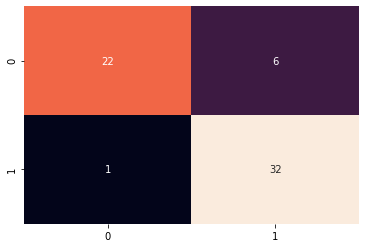

In [45]:
# using seaborn heatmap to show clearly
sns.heatmap(conf_metrix, annot=True, cbar=False)

In [48]:
# let's create a function and save this to be used multiple times 
def con_met_plot(conf_matrix):
    fig, ax = plt.subplots(figsize = (4, 4))
    ax = sns.heatmap(conf_matrix, cbar=False, annot=True)
    ax.set(title='Confusion Metrix of where our model getting confused',
           xlabel='True Negative and False Negative Rates',
           ylabel='True Positive and False Positive Rates')
    

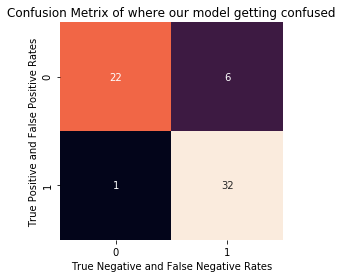

In [49]:
con_met_plot(conf_metrix)

In [50]:
# 4. Classification Report
from sklearn.metrics import classification_report

In [57]:
clas_report = classification_report(y_test, y_preds)
clas_report

'              precision    recall  f1-score   support\n\n           0       0.96      0.79      0.86        28\n           1       0.84      0.97      0.90        33\n\n    accuracy                           0.89        61\n   macro avg       0.90      0.88      0.88        61\nweighted avg       0.89      0.89      0.88        61\n'

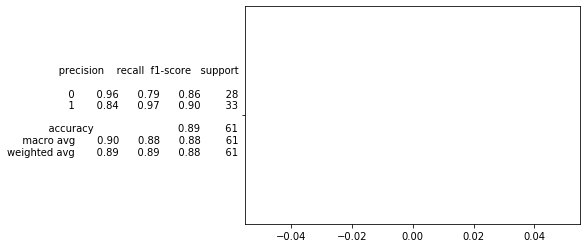

In [56]:
plt.plot(clas_report)

## 2. With Scoring parameters (classification Model) use only 'cross_val_score' method

In [62]:
np.random.seed(43)
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.83606557, 0.8852459 , 0.75409836, 0.81666667, 0.75      ])

In [66]:
# checking the mean accuracy
np.random.seed(43)
accuracy = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
accuracy, accuracy.mean(), np.mean(accuracy)

(array([0.83606557, 0.8852459 , 0.75409836, 0.81666667, 0.75      ]),
 0.8084153005464481,
 0.8084153005464481)

In [68]:
# 2. area under curve accuracy
np.random.seed(43)

auc_accuracy = cross_val_score(clf, x, y, cv=5, scoring='roc_auc')
auc_accuracy, np.mean(auc_accuracy)

(array([0.88041126, 0.96807359, 0.86958874, 0.9023569 , 0.86924804]),
 0.8979357062690397)

In [70]:
# 3. balanced accuracy
np.random.seed(43)

balanced_auc = cross_val_score(clf, x, y, cv=5, scoring='balanced_accuracy')
balanced_auc, np.mean(balanced_auc)

(array([0.82954545, 0.88852814, 0.75378788, 0.81313131, 0.73569024]),
 0.8041366041366041)

# Regression Model & its Evaluation


In [73]:
np.random.seed(43)
x = boston_df.drop('target', axis=1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor().fit(x_test, y_test)

## 1st: Estimators Score Method

In [74]:
# checking the r^2 score
model.score(x_test, y_test)

0.9701012960797457

In [76]:
from sklearn.metrics import r2_score
y_preds = model.predict(x_test)

r2_score(y_test, y_preds)

0.9701012960797456

In [77]:
# 2. mean absolute error
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

1.161656862745096

In [80]:
# 3. mean squared error
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds)

2.75732138235293

## 2. Scoring Parameters

In [84]:
np.random.seed(43)
r2_score = cross_val_score(model, x, y, cv=5, scoring=None)
r2_score, np.mean(r2_score)

(array([0.77604911, 0.85597772, 0.75579003, 0.4579774 , 0.26047638]),
 0.6212541287387404)

In [87]:
# with passing r2 score as a scoring parameter
np.random.seed(33)
r2 = cross_val_score(model, x, y, cv=5, scoring='r2')
r2, np.mean(r2)

(array([0.76932777, 0.84944695, 0.74070266, 0.45474917, 0.27209916]),
 0.6172651434593942)

In [88]:
# mean squared error
np.random.seed(43)
mse = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
mse, np.mean(mse)

(array([ -7.73418772, -13.11132091, -19.55809343, -47.54180563,
        -19.66268827]),
 -21.521619190661994)

In [89]:
mse

array([ -7.73418772, -13.11132091, -19.55809343, -47.54180563,
       -19.66268827])

In [100]:
data = np.random.randint(4, 55, size=(3033, 14))
data

array([[51, 21, 42, ...,  6, 40, 37],
       [38, 54, 13, ..., 52, 41, 25],
       [ 7, 46, 17, ...,  6, 24, 11],
       ...,
       [49, 25,  4, ..., 45, 29, 49],
       [ 8,  4, 24, ..., 22, 35, 33],
       [31, 21, 34, ..., 33, 22, 38]])

In [104]:
import pandas as pd
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'])
df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,51,21,42,25,30,35,15,12,35,47,51,6,40,37
1,38,54,13,5,32,52,33,27,23,8,31,52,41,25
2,7,46,17,24,42,34,50,20,38,24,35,6,24,11
3,29,38,28,33,39,49,27,43,37,12,36,10,23,34
4,6,50,4,19,45,35,31,43,41,4,49,11,17,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,20,30,27,44,51,32,53,15,38,41,11,24,7,46
3029,26,7,33,42,7,44,45,50,6,14,32,48,13,21
3030,49,25,4,17,15,52,31,18,17,32,18,45,29,49
3031,8,4,24,30,45,44,33,7,50,12,8,22,35,33


In [123]:
df['target'] = np.random.randint(0, 2, size=len(df))

In [124]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,target
0,51,21,42,25,30,35,15,12,35,47,51,6,40,37,0
1,38,54,13,5,32,52,33,27,23,8,31,52,41,25,1
2,7,46,17,24,42,34,50,20,38,24,35,6,24,11,0
3,29,38,28,33,39,49,27,43,37,12,36,10,23,34,1
4,6,50,4,19,45,35,31,43,41,4,49,11,17,5,1


In [125]:
df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,target
0,51,21,42,25,30,35,15,12,35,47,51,6,40,37,0
1,38,54,13,5,32,52,33,27,23,8,31,52,41,25,1
2,7,46,17,24,42,34,50,20,38,24,35,6,24,11,0
3,29,38,28,33,39,49,27,43,37,12,36,10,23,34,1
4,6,50,4,19,45,35,31,43,41,4,49,11,17,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,20,30,27,44,51,32,53,15,38,41,11,24,7,46,1
3029,26,7,33,42,7,44,45,50,6,14,32,48,13,21,0
3030,49,25,4,17,15,52,31,18,17,32,18,45,29,49,0
3031,8,4,24,30,45,44,33,7,50,12,8,22,35,33,1


In [126]:
df.describe

<bound method NDFrame.describe of        A   B   C   D   E   F   G   H   I   J   K   L   M   N  target
0     51  21  42  25  30  35  15  12  35  47  51   6  40  37       0
1     38  54  13   5  32  52  33  27  23   8  31  52  41  25       1
2      7  46  17  24  42  34  50  20  38  24  35   6  24  11       0
3     29  38  28  33  39  49  27  43  37  12  36  10  23  34       1
4      6  50   4  19  45  35  31  43  41   4  49  11  17   5       1
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..     ...
3028  20  30  27  44  51  32  53  15  38  41  11  24   7  46       1
3029  26   7  33  42   7  44  45  50   6  14  32  48  13  21       0
3030  49  25   4  17  15  52  31  18  17  32  18  45  29  49       0
3031   8   4  24  30  45  44  33   7  50  12   8  22  35  33       1
3032  31  21  34  46  17  27  12  22  44  17  52  33  22  38       1

[3033 rows x 15 columns]>

In [127]:
df.dtypes

A         int32
B         int32
C         int32
D         int32
E         int32
F         int32
G         int32
H         int32
I         int32
J         int32
K         int32
L         int32
M         int32
N         int32
target    int32
dtype: object

In [128]:
df.isna().sum()

A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
K         0
L         0
M         0
N         0
target    0
dtype: int64

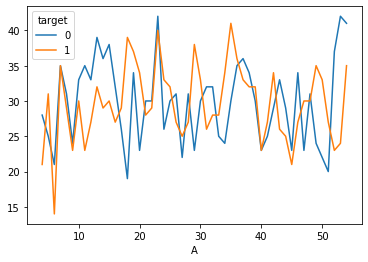

In [130]:
pd.crosstab(df['A'], df['target']).plot()

In [132]:
df['age'] = np.random.randint(44, 70, size=len(df))
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,target,age
0,51,21,42,25,30,35,15,12,35,47,51,6,40,37,0,45
1,38,54,13,5,32,52,33,27,23,8,31,52,41,25,1,49
2,7,46,17,24,42,34,50,20,38,24,35,6,24,11,0,60
3,29,38,28,33,39,49,27,43,37,12,36,10,23,34,1,54
4,6,50,4,19,45,35,31,43,41,4,49,11,17,5,1,55


In [133]:
clf = RandomForestClassifier()

In [134]:
x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
clf.score(x_test, y_test)

0.5074850299401198

In [137]:
# Trying to improve by passing estimatiors 
for i in range(10, 100, 10):
    print(f'The Model training with {i} estimators is..........')
    clf = RandomForestClassifier(n_estimators = i).fit(x_test, y_test)
    print(f'The Accuract score of this model is: {clf.score(x_test, y_test)*100:.3f}%')

The Model training with 10 estimators is..........
The Accuract score of this model is: 98.503%
The Model training with 20 estimators is..........
The Accuract score of this model is: 100.000%
The Model training with 30 estimators is..........
The Accuract score of this model is: 99.850%
The Model training with 40 estimators is..........
The Accuract score of this model is: 100.000%
The Model training with 50 estimators is..........
The Accuract score of this model is: 100.000%
The Model training with 60 estimators is..........
The Accuract score of this model is: 100.000%
The Model training with 70 estimators is..........
The Accuract score of this model is: 100.000%
The Model training with 80 estimators is..........
The Accuract score of this model is: 100.000%
The Model training with 90 estimators is..........
The Accuract score of this model is: 100.000%


In [138]:
clf.score(x_test, y_test)

1.0

In [140]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,

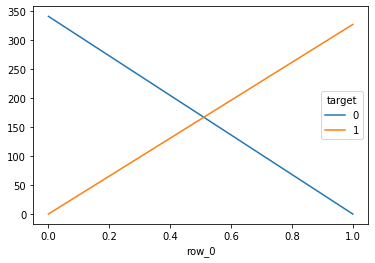

In [141]:
pd.crosstab(y_preds, y_test).plot();

In [143]:
y_probs = clf.predict_proba(x_test)
y_probs[:11]

array([[0.91111111, 0.08888889],
       [0.92222222, 0.07777778],
       [0.17777778, 0.82222222],
       [0.81111111, 0.18888889],
       [0.15555556, 0.84444444],
       [0.74444444, 0.25555556],
       [0.84444444, 0.15555556],
       [0.77777778, 0.22222222],
       [0.17777778, 0.82222222],
       [0.13333333, 0.86666667],
       [0.8       , 0.2       ]])

# Evaluating ML model with sklearn functions\
* Classifier Model
* Regressor Model

In [1]:
# Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
heart_disease = pd.read_csv('Data/heart-disease.csv')

In [3]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
len(heart_disease)

303

In [6]:
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=(0.2))
clf = RandomForestClassifier().fit(x_train, y_train)

In [8]:
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [9]:
# Evaluating with sklearn functions
from sklearn.metrics import precision_score, recall_score, f1_score

In [10]:
precision_score(y_test, y_preds)

0.8529411764705882

In [11]:
clf.score(x_test, y_test)

0.8524590163934426

In [13]:
np.mean(cross_val_score(clf, x, y, cv=5))

0.8248633879781423

In [14]:
recall_score(y_test, y_preds)

0.8787878787878788

In [15]:
f1_score(y_test, y_preds)

0.8656716417910447

In [16]:
# Regression Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [17]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [18]:
boston_df = pd.DataFrame(boston['data'],
                         columns=boston['feature_names'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
boston_df['target'] = boston['target']
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [25]:
x = boston_df.drop('target', axis=1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=(0.2))
model = RandomForestRegressor()

In [26]:
len(x_train), len(x_test), len(y_train), len(y_test)

(404, 102, 404, 102)

In [27]:
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8960337222498782

In [29]:
y_preds = model.predict(x_test)
y_preds

array([26.635, 20.419, 20.039, 22.886, 21.342, 31.049, 13.641, 19.882,
       22.174, 26.309,  6.656, 25.563, 14.365, 19.111, 43.827, 24.453,
       18.873, 23.66 , 26.487, 19.399, 25.893, 20.801, 21.535, 21.685,
       20.903, 18.808, 10.552, 27.045, 15.739, 18.006, 11.062, 16.527,
       11.562, 20.338, 19.145, 35.023, 21.264, 25.51 , 20.891, 34.459,
       23.029, 14.982,  7.5  , 20.545, 15.575, 46.484, 19.632, 18.522,
       14.752, 29.557, 15.75 , 44.495, 28.997, 21.991, 17.497,  8.95 ,
       20.498, 21.421,  9.093, 25.231, 14.666, 23.194, 13.918, 18.547,
       21.054, 38.547, 11.684, 26.165, 34.195, 14.989, 28.005, 20.697,
       21.447, 28.981,  9.718, 20.528, 23.023, 21.512, 19.921, 20.426,
       24.48 , 19.058, 11.885, 26.144, 20.821, 19.443, 10.413, 20.335,
       25.207, 46.145, 26.739, 20.212, 31.262, 19.653, 40.574, 25.888,
       19.955, 18.727, 18.891, 20.481, 19.477, 18.448])

In [30]:
# checking the probability
y_probs = model.predict_proba(x_test)
y_probs[:11]

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

In [ ]:
pd.crosstab(y_test, y_pre)